# Servicio de Agua

### Instalación de librerias

In [192]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [193]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
origin_path = '../dataset'

# 1. Cargar los archivos csv, correspondientes del 2021 al 2023:

*   Usuarios (75000 reg.)
*   Medidores (75000 reg.)
*   Mediciones (1mill+ reg.)

In [194]:
users_data_path = os.path.join(origin_path, 'users.csv')
df_users = pd.read_csv(users_data_path)
df_users.set_index('id')

,name,address
id,,
0,Antonio Emiliano Vázquez Saucedo,"Calle Flórez 547 Edif. 110 , Depto. 669\nSan S..."
1,Mercedes Arriaga,"Calle Sur Avilés 732 596\nVieja Lituania, MOR ..."
2,Serafín Lomeli Lebrón,"Circuito Sur Ibarra 984 Edif. 103 , Depto. 141..."
3,Dulce Blanco,Calzada Etiopía 942 Interior 101\nVieja Tuvalu...
4,Lic. Bernardo Sevilla,Boulevard Santo Tomé y Príncipe 235 Interior 8...
...,...,...
74995,Elias Maldonado Sevilla,Periférico Durango 646 Interior 201\nNueva Arg...
74996,Isabel Mauro Narváez Lara,"Ampliación Norte Núñez 818 997\nNueva Libia, B..."
74997,Linda Lilia Gracia Barrientos,"Avenida Guanajuato 560 Edif. 198 , Depto. 137\..."


In [195]:
meters_data_path = os.path.join(origin_path, 'meters.csv')
df_meters = pd.read_csv(meters_data_path)
df_meters.set_index('id')

,meter_code,category,zone,date_creation
id,,,,
0,A7XJ718334,S,SE,2021-07-13
1,D8JU555818,R4,NE,2021-02-05
2,E3GM687457,I,SE,2023-02-16
3,X3CU414126,S,E,2022-05-14
4,U7CD525161,R2,O,2023-09-16
...,...,...,...,...
74995,V5CH721872,I,N,2022-12-29
74996,N2RJ318631,C,SO,2023-03-28
74997,N3FT433128,C,SE,2023-10-16


In [196]:
lectures_data_path = os.path.join(origin_path, 'lectures.csv')
df_lectures = pd.read_csv(lectures_data_path)
df_lectures

,meter_code,period,lecture
0,A7XJ718334,jul-2021,156
1,A7XJ718334,ago-2021,102
2,A7XJ718334,sep-2021,104
3,A7XJ718334,oct-2021,66
4,A7XJ718334,nov-2021,72
...,...,...,...
1384497,X7OC137648,ago-2023,235
1384498,X7OC137648,sep-2023,136
1384499,X7OC137648,oct-2023,188
1384500,X7OC137648,nov-2023,227


# 2. Desglosar columnas en los medidores para faciltar el análisis en base a la siguiente codificación.

| Código | Descripción |
|--------|-------------|
|    N   |    Norte    |
|    S   |     Sur     |
|    E   |     Este    |
|    O   |    Oeste    |
|    C   |    Centro   |
|   NO   |  Nor-Oeste  |
|   NE   |   Nor-Este  |
|   SO   |  Sur-Oeste  |
|   SE   |   Sur-Este  |

Además de separar la columna fecha en año y mes de conección para la lecturación mensual correspondiente.

In [197]:
zone = {
  'N':'Norte',
  'S':	"Sur",
  "E": "Este",
  "O": "Oeste",
  "C": "Centro",
  "NO": "Nor-Oeste",
  "NE": "Nor-Este",
  "SO":"Sur-Oeste",
  "SE":"Sur-Este"
}
df_meters['zone'] = df_meters['zone'].apply(lambda z: zone[z])
df_meters

,id,meter_code,category,zone,date_creation
0,0,A7XJ718334,S,Sur-Este,2021-07-13
1,1,D8JU555818,R4,Nor-Este,2021-02-05
2,2,E3GM687457,I,Sur-Este,2023-02-16
3,3,X3CU414126,S,Este,2022-05-14
4,4,U7CD525161,R2,Oeste,2023-09-16
...,...,...,...,...,...
74995,74995,V5CH721872,I,Norte,2022-12-29
74996,74996,N2RJ318631,C,Sur-Oeste,2023-03-28
74997,74997,N3FT433128,C,Sur-Este,2023-10-16
74998,74998,P2XR232568,I,Sur-Este,2023-05-22


In [198]:
df_meters['year'] = df_meters['date_creation'].apply(lambda y: int(y.split('-')[0]))
df_meters['month'] = df_meters['date_creation'].apply(lambda y: int(y.split('-')[1]))
df_meters

,id,meter_code,category,zone,date_creation,year,month
0,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7
1,1,D8JU555818,R4,Nor-Este,2021-02-05,2021,2
2,2,E3GM687457,I,Sur-Este,2023-02-16,2023,2
3,3,X3CU414126,S,Este,2022-05-14,2022,5
4,4,U7CD525161,R2,Oeste,2023-09-16,2023,9
...,...,...,...,...,...,...,...
74995,74995,V5CH721872,I,Norte,2022-12-29,2022,12
74996,74996,N2RJ318631,C,Sur-Oeste,2023-03-28,2023,3
74997,74997,N3FT433128,C,Sur-Este,2023-10-16,2023,10
74998,74998,P2XR232568,I,Sur-Este,2023-05-22,2023,5


La categorización corresponde a la siguiente tabla:

| Categoría | Descripción        |
|-----------|--------------------|
|     R1    |      Doméstico     |
|     R2    |      Doméstico     |
|     R3    |      Doméstico     |
|     R4    |      Doméstico     |
|     C     |      Comercial     |
|     CE    | Comercial Especial |
|     I     |     Industrial     |
|     P     |    Preferencial    |
|     S     |       Social       |

In [204]:
df_users_meters = pd.merge(df_users, df_meters, on=['id'], how="outer")
df_users_meters

,id,name,address,meter_code,category,zone,date_creation,year,month
0,0,Antonio Emiliano Vázquez Saucedo,"Calle Flórez 547 Edif. 110 , Depto. 669\nSan S...",A7XJ718334,S,Sur-Este,2021-07-13,2021,7
1,1,Mercedes Arriaga,"Calle Sur Avilés 732 596\nVieja Lituania, MOR ...",D8JU555818,R4,Nor-Este,2021-02-05,2021,2
2,2,Serafín Lomeli Lebrón,"Circuito Sur Ibarra 984 Edif. 103 , Depto. 141...",E3GM687457,I,Sur-Este,2023-02-16,2023,2
3,3,Dulce Blanco,Calzada Etiopía 942 Interior 101\nVieja Tuvalu...,X3CU414126,S,Este,2022-05-14,2022,5
4,4,Lic. Bernardo Sevilla,Boulevard Santo Tomé y Príncipe 235 Interior 8...,U7CD525161,R2,Oeste,2023-09-16,2023,9
...,...,...,...,...,...,...,...,...,...
74995,74995,Elias Maldonado Sevilla,Periférico Durango 646 Interior 201\nNueva Arg...,V5CH721872,I,Norte,2022-12-29,2022,12
74996,74996,Isabel Mauro Narváez Lara,"Ampliación Norte Núñez 818 997\nNueva Libia, B...",N2RJ318631,C,Sur-Oeste,2023-03-28,2023,3
74997,74997,Linda Lilia Gracia Barrientos,"Avenida Guanajuato 560 Edif. 198 , Depto. 137\...",N3FT433128,C,Sur-Este,2023-10-16,2023,10
74998,74998,Julia Camarillo,"Avenida Norte Sarabia 929 Edif. 959 , Depto. 8...",P2XR232568,I,Sur-Este,2023-05-22,2023,5


In [205]:
data_users_2021 = df_users_meters.loc[(df_users_meters['year'] == 2021)].sort_values(by=['month', 'date_creation'])
data_users_2021

,id,name,address,meter_code,category,zone,date_creation,year,month
618,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1
1128,1128,Esparta Jonás Monroy,Pasaje Guanajuato 300 865\nVieja República Uni...,K4OG442387,R1,Sur-Oeste,2021-01-02,2021,1
1362,1362,Patricio Espino,"Corredor San Luis Potosí 566 064\nNueva Mali, ...",P8RF683182,R1,Centro,2021-01-02,2021,1
2826,2826,Juan Carlos Sara Pulido Moreno,Diagonal Chad 570 Interior 458\nSan José María...,W1PJ857837,S,Este,2021-01-02,2021,1
4117,4117,Mtro. Emiliano Montaño,Eje vial Holguín 010 698\nSan Helena de la Mon...,F1UL831715,P,Nor-Oeste,2021-01-02,2021,1
...,...,...,...,...,...,...,...,...,...
69445,69445,Serafín Amelia Mota,Calzada Coahuila de Zaragoza 856 Interior 579\...,X7XF154152,R4,Sur,2021-12-31,2021,12
69768,69768,Cecilia Augusto del Río,Ampliación Norte Baeza 670 344\nSan Isaac los ...,J4VV773688,I,Este,2021-12-31,2021,12
70814,70814,Samuel Rosales,"Periférico Ochoa 049 711\nVieja Finlandia, VER...",E8FX133635,R1,Nor-Este,2021-12-31,2021,12
71137,71137,Serafín Mendoza,"Circunvalación Grecia 021 994\nNueva Guinea, Y...",E4SI284876,R1,Nor-Este,2021-12-31,2021,12


In [206]:
data_users_2022 = df_users_meters.loc[(df_users_meters['year'] == 2022)].sort_values(by=['month', 'date_creation'])
data_users_2022

,id,name,address,meter_code,category,zone,date_creation,year,month
220,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1
986,986,Nicolás Alonzo,Callejón Sur Rojas 742 Interior 765\nSan Eugen...,W8XD364242,R2,Sur-Oeste,2022-01-01,2022,1
1150,1150,Abigail Sandra Olivares Ramos,Ampliación Mojica 890 Interior 821\nVieja Repú...,M8JU175382,R3,Nor-Este,2022-01-01,2022,1
2023,2023,Patricio Nayeli de la Garza,Eje vial Castro 704 981\nNueva Santo Tomé y Pr...,H2CV788414,C,Centro,2022-01-01,2022,1
3806,3806,Jorge Juan Rojas,"Continuación Sur Escobar 466 Edif. 054 , Depto...",D3HO214774,R4,Sur-Oeste,2022-01-01,2022,1
...,...,...,...,...,...,...,...,...,...
69429,69429,Noemí Corrales Rangel,Andador Norte Nájera 802 Interior 826\nSan Ruf...,C3UC454116,I,Centro,2022-12-31,2022,12
69884,69884,Itzel Tapia,Ampliación Trejo 571 Interior 290\nNueva Canad...,U4WQ547117,R3,Sur-Oeste,2022-12-31,2022,12
70687,70687,Abril Ibarra,Calzada Sur Arias 129 802\nSan Mariano los baj...,V6WJ812754,I,Centro,2022-12-31,2022,12
71101,71101,Rebeca Soliz Rojo,"Diagonal Pelayo 798 692\nNueva Nicaragua, TAMP...",S1JE424541,R4,Centro,2022-12-31,2022,12


In [207]:
data_users_2023 = df_users_meters.loc[(df_users_meters['year'] == 2023)].sort_values(by=['month', 'date_creation'])
data_users_2023

,id,name,address,meter_code,category,zone,date_creation,year,month
338,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1
2036,2036,María Jaime Reséndez,Cerrada Mozambique 009 509\nSan José Manuél lo...,N3MK866121,CE,Este,2023-01-01,2023,1
6474,6474,Zoé Granados,Retorno Nicaragua 005 715\nSan Vicente los baj...,J6WY842727,I,Centro,2023-01-01,2023,1
6478,6478,Carolina Jos Villegas,"Corredor Tuvalu 428 Edif. 043 , Depto. 764\nSa...",S3KT177434,C,Este,2023-01-01,2023,1
6563,6563,Horacio Rivero,"Pasaje Sur Amaya 566 Edif. 583 , Depto. 055\nV...",Y8VS724182,S,Sur-Este,2023-01-01,2023,1
...,...,...,...,...,...,...,...,...,...
71698,71698,Eloisa Sanches Reynoso,"Corredor Quintana Roo 742 Edif. 429 , Depto. 3...",L7KE321658,S,Norte,2023-12-31,2023,12
72067,72067,María José Uribe Laboy,"Diagonal Norte Armendáriz 793 Edif. 924 , Dept...",U2FE523276,I,Oeste,2023-12-31,2023,12
73545,73545,Inés Ivonne Trejo,Diagonal Kenya 471 Interior 706\nSan Diana los...,C4SH253461,P,Sur-Oeste,2023-12-31,2023,12
74683,74683,Guillermina Leonor Pabón,Circunvalación Iraq 247 568\nVieja Timor-Leste...,T6VY825221,R1,Nor-Oeste,2023-12-31,2023,12


In [211]:
df_meters_lectures = pd.merge(df_meters, df_lectures,  on=['meter_code'], how="inner")
df_meters_lectures

,id,meter_code,category,zone,date_creation,year,month,period,lecture
0,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7,jul-2021,156
1,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7,ago-2021,102
2,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7,sep-2021,104
3,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7,oct-2021,66
4,0,A7XJ718334,S,Sur-Este,2021-07-13,2021,7,nov-2021,72
...,...,...,...,...,...,...,...,...,...
1384497,74999,X7OC137648,CE,Nor-Este,2022-01-17,2022,1,ago-2023,235
1384498,74999,X7OC137648,CE,Nor-Este,2022-01-17,2022,1,sep-2023,136
1384499,74999,X7OC137648,CE,Nor-Este,2022-01-17,2022,1,oct-2023,188
1384500,74999,X7OC137648,CE,Nor-Este,2022-01-17,2022,1,nov-2023,227


In [212]:

total_consume = df_meters_lectures.groupby(by=['meter_code', 'zone', 'category'])['lecture'].sum().reset_index()
total_consume

,meter_code,zone,category,lecture
0,A1AA687872,Nor-Oeste,CE,1237
1,A1AE337342,Nor-Oeste,I,10619
2,A1AE547348,Nor-Este,P,8914
3,A1AE564666,Oeste,P,6809
4,A1AF644364,Este,R2,32
...,...,...,...,...
74995,Y8YP146577,Nor-Oeste,I,10123
74996,Y8YQ126216,Nor-Oeste,I,1291
74997,Y8YS148372,Oeste,I,7681
74998,Y8YV835255,Centro,C,738


In [215]:
consume_by_cat = total_consume.groupby('category')['lecture'].sum().reset_index()
consume_by_cat

,category,lecture
0,C,7770947
1,CE,21040923
2,I,79377654
3,P,48550896
4,R1,1758702
5,R2,1733102
6,R3,1714990
7,R4,1735963
8,S,17194147


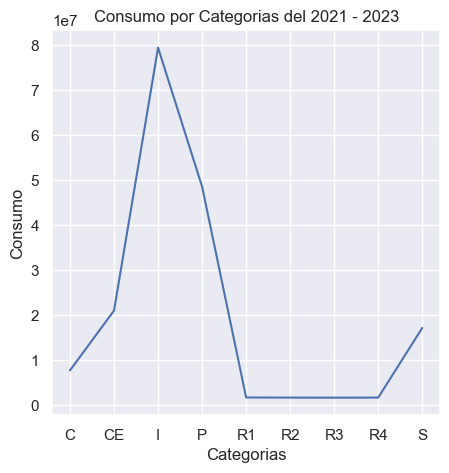

In [281]:
plt.figure(figsize=(5, 5))
plt.title('Consumo por Categorias del 2021 - 2023')
plt.grid(visible=True)
plt.plot(consume_by_cat['category'], consume_by_cat['lecture'])
plt.ylabel('Consumo')
plt.xlabel('Categorias')
plt.show()

In [217]:
consume_by_zone = total_consume.groupby('zone')['lecture'].sum().reset_index()
consume_by_zone

,zone,lecture
0,Centro,19855032
1,Este,19726227
2,Nor-Este,20054139
3,Nor-Oeste,19895744
4,Norte,20447572
5,Oeste,20195069
6,Sur,20235806
7,Sur-Este,20249106
8,Sur-Oeste,20218629


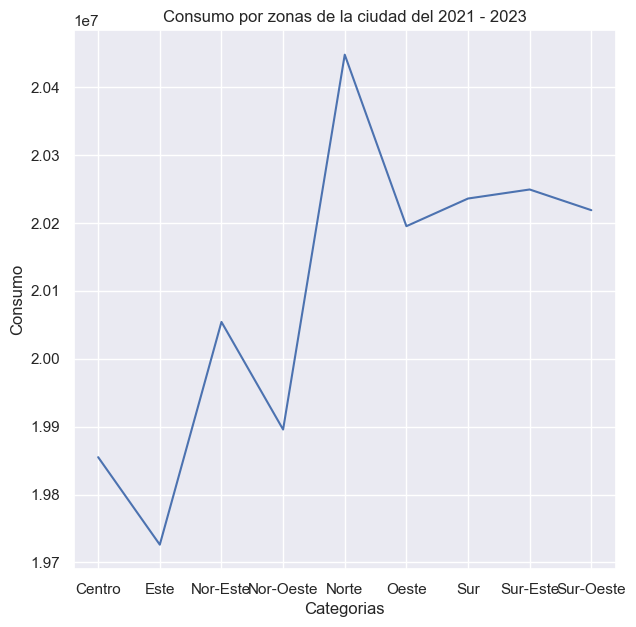

In [282]:
plt.figure(figsize=(7, 7))
plt.title('Consumo por zonas de la ciudad del 2021 - 2023')
plt.grid(visible=True)
plt.plot(consume_by_zone['zone'], consume_by_zone['lecture'])
plt.ylabel('Consumo')
plt.xlabel('Categorias')
plt.show()

In [219]:
# Total de acometidas por Zona
meters_by_zone = df_meters.value_counts('zone').reset_index()
meters_by_zone

,zone,count
0,Sur,8430
1,Sur-Este,8393
2,Centro,8358
3,Norte,8351
4,Oeste,8328
5,Nor-Oeste,8318
6,Sur-Oeste,8315
7,Nor-Este,8311
8,Este,8196


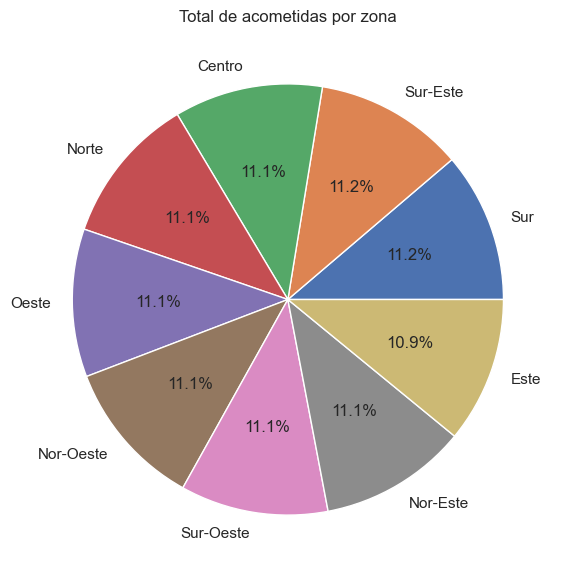

In [220]:
plt.figure(figsize=(7, 7))
plt.title('Total de acometidas por zona')
plt.grid(visible=True)
plt.pie(
  meters_by_zone['count'], 
  labels = meters_by_zone['zone'], 
  autopct='%1.1f%%',
)
plt.show()

In [221]:
# Total de acometidas por categoria
meters_by_cat = df_meters.value_counts('category').reset_index()
meters_by_cat

,category,count
0,I,15005
1,R1,7664
2,CE,7552
3,S,7486
4,P,7477
5,R4,7477
6,C,7457
7,R2,7447
8,R3,7435


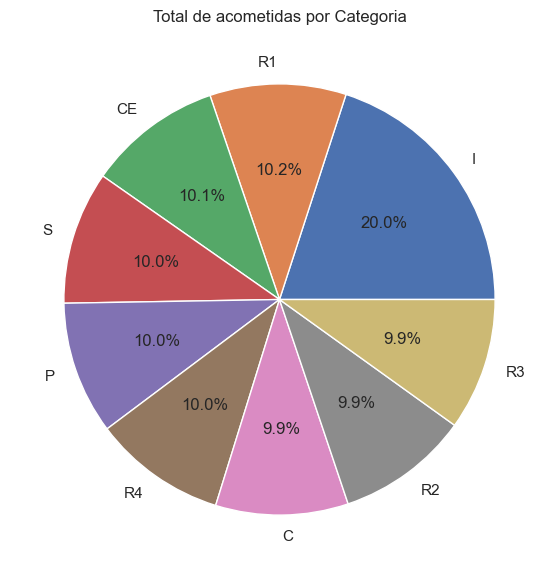

In [222]:
plt.figure(figsize=(7, 7))
plt.title('Total de acometidas por Categoria')
plt.grid(visible=True)
plt.pie(
  meters_by_cat['count'], 
  labels = meters_by_cat['category'], 
  autopct='%1.1f%%',
)
plt.show()

# 2021

In [230]:
# 2021
# Todo lo que se consumio en agua por categoria y por zona

data_users_2021

,id,name,address,meter_code,category,zone,date_creation,year,month
618,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1
1128,1128,Esparta Jonás Monroy,Pasaje Guanajuato 300 865\nVieja República Uni...,K4OG442387,R1,Sur-Oeste,2021-01-02,2021,1
1362,1362,Patricio Espino,"Corredor San Luis Potosí 566 064\nNueva Mali, ...",P8RF683182,R1,Centro,2021-01-02,2021,1
2826,2826,Juan Carlos Sara Pulido Moreno,Diagonal Chad 570 Interior 458\nSan José María...,W1PJ857837,S,Este,2021-01-02,2021,1
4117,4117,Mtro. Emiliano Montaño,Eje vial Holguín 010 698\nSan Helena de la Mon...,F1UL831715,P,Nor-Oeste,2021-01-02,2021,1
...,...,...,...,...,...,...,...,...,...
69445,69445,Serafín Amelia Mota,Calzada Coahuila de Zaragoza 856 Interior 579\...,X7XF154152,R4,Sur,2021-12-31,2021,12
69768,69768,Cecilia Augusto del Río,Ampliación Norte Baeza 670 344\nSan Isaac los ...,J4VV773688,I,Este,2021-12-31,2021,12
70814,70814,Samuel Rosales,"Periférico Ochoa 049 711\nVieja Finlandia, VER...",E8FX133635,R1,Nor-Este,2021-12-31,2021,12
71137,71137,Serafín Mendoza,"Circunvalación Grecia 021 994\nNueva Guinea, Y...",E4SI284876,R1,Nor-Este,2021-12-31,2021,12


In [231]:
df_lectures['year'] = df_lectures['period'].apply(lambda d : d.split('-')[1])
df_lectures_2021 = df_lectures.loc[df_lectures['year']=='2021']
df_lectures_2021

,meter_code,period,lecture,year
0,A7XJ718334,jul-2021,156,2021
1,A7XJ718334,ago-2021,102,2021
2,A7XJ718334,sep-2021,104,2021
3,A7XJ718334,oct-2021,66,2021
4,A7XJ718334,nov-2021,72,2021
...,...,...,...,...
1384415,X5RL844183,ago-2021,98,2021
1384416,X5RL844183,sep-2021,17,2021
1384417,X5RL844183,oct-2021,49,2021
1384418,X5RL844183,nov-2021,86,2021


## Lecturaciones 2021

In [252]:
df_2021 = pd.merge(data_users_2021, df_lectures_2021, on=['meter_code'],how="inner")
df_2021

,id,name,address,meter_code,category,zone,date_creation,year_x,month,period,lecture,year_y
0,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1,ene-2021,366,2021
1,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1,feb-2021,331,2021
2,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1,mar-2021,363,2021
3,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1,abr-2021,301,2021
4,618,Sr(a). Bruno Santiago,"Continuación Albania 357 Edif. 006 , Depto. 26...",V5GD126877,I,Sur,2021-01-02,2021,1,may-2021,397,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
161032,69445,Serafín Amelia Mota,Calzada Coahuila de Zaragoza 856 Interior 579\...,X7XF154152,R4,Sur,2021-12-31,2021,12,dic-2021,19,2021
161033,69768,Cecilia Augusto del Río,Ampliación Norte Baeza 670 344\nSan Isaac los ...,J4VV773688,I,Este,2021-12-31,2021,12,dic-2021,408,2021
161034,70814,Samuel Rosales,"Periférico Ochoa 049 711\nVieja Finlandia, VER...",E8FX133635,R1,Nor-Este,2021-12-31,2021,12,dic-2021,1,2021
161035,71137,Serafín Mendoza,"Circunvalación Grecia 021 994\nNueva Guinea, Y...",E4SI284876,R1,Nor-Este,2021-12-31,2021,12,dic-2021,23,2021


In [253]:
df_2021_by_cat = df_2021.groupby('category')['lecture'].sum().reset_index()
df_2021_by_cat

,category,lecture
0,C,911997
1,CE,2386079
2,I,9046986
3,P,5723272
4,R1,207277
5,R2,203451
6,R3,203842
7,R4,201950
8,S,1993100


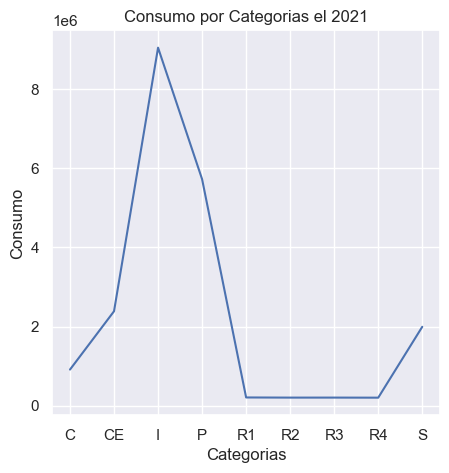

In [265]:
plt.figure(figsize=(5, 5))
plt.title('Consumo por Categorias el 2021')
plt.grid(visible=True)
plt.plot(df_2021_by_cat['category'], df_2021_by_cat['lecture'])
plt.ylabel('Consumo')
plt.xlabel('Categorias')
plt.show()

In [255]:
df_2021_by_zone = df_2021.groupby('zone')['lecture'].sum().reset_index()
df_2021_by_zone

,zone,lecture
0,Centro,2312100
1,Este,2267219
2,Nor-Este,2283536
3,Nor-Oeste,2292038
4,Norte,2308433
5,Oeste,2364287
6,Sur,2376544
7,Sur-Este,2347189
8,Sur-Oeste,2326608


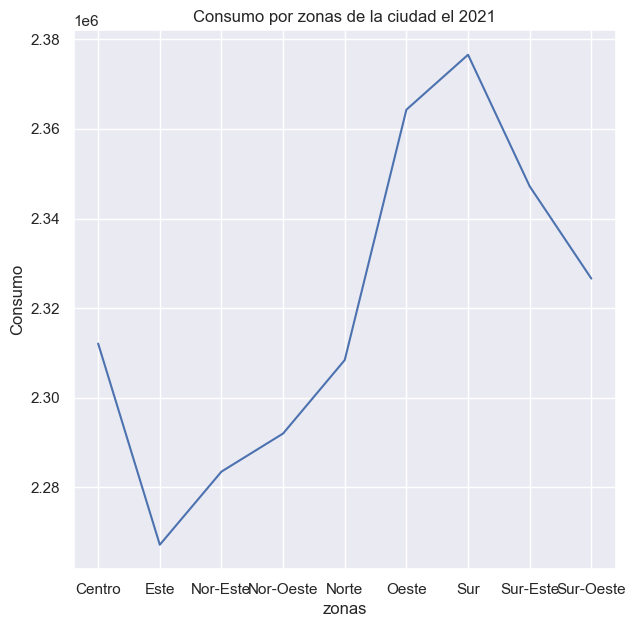

In [266]:
plt.figure(figsize=(7, 7))
plt.title('Consumo por zonas de la ciudad el 2021')
plt.grid(visible=True)
plt.plot(df_2021_by_zone['zone'], df_2021_by_zone['lecture'])
plt.ylabel('Consumo')
plt.xlabel('zonas')
plt.show()

# 2022

In [257]:
data_users_2022

,id,name,address,meter_code,category,zone,date_creation,year,month
220,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1
986,986,Nicolás Alonzo,Callejón Sur Rojas 742 Interior 765\nSan Eugen...,W8XD364242,R2,Sur-Oeste,2022-01-01,2022,1
1150,1150,Abigail Sandra Olivares Ramos,Ampliación Mojica 890 Interior 821\nVieja Repú...,M8JU175382,R3,Nor-Este,2022-01-01,2022,1
2023,2023,Patricio Nayeli de la Garza,Eje vial Castro 704 981\nNueva Santo Tomé y Pr...,H2CV788414,C,Centro,2022-01-01,2022,1
3806,3806,Jorge Juan Rojas,"Continuación Sur Escobar 466 Edif. 054 , Depto...",D3HO214774,R4,Sur-Oeste,2022-01-01,2022,1
...,...,...,...,...,...,...,...,...,...
69429,69429,Noemí Corrales Rangel,Andador Norte Nájera 802 Interior 826\nSan Ruf...,C3UC454116,I,Centro,2022-12-31,2022,12
69884,69884,Itzel Tapia,Ampliación Trejo 571 Interior 290\nNueva Canad...,U4WQ547117,R3,Sur-Oeste,2022-12-31,2022,12
70687,70687,Abril Ibarra,Calzada Sur Arias 129 802\nSan Mariano los baj...,V6WJ812754,I,Centro,2022-12-31,2022,12
71101,71101,Rebeca Soliz Rojo,"Diagonal Pelayo 798 692\nNueva Nicaragua, TAMP...",S1JE424541,R4,Centro,2022-12-31,2022,12


In [258]:
df_lectures['year'] = df_lectures['period'].apply(lambda d : d.split('-')[1])
df_lectures_2022 = df_lectures.loc[df_lectures['year']=='2022']
df_lectures_2022

,meter_code,period,lecture,year
6,A7XJ718334,ene-2022,64,2022
7,A7XJ718334,feb-2022,128,2022
8,A7XJ718334,mar-2022,87,2022
9,A7XJ718334,abr-2022,131,2022
10,A7XJ718334,may-2022,61,2022
...,...,...,...,...
1384485,X7OC137648,ago-2022,79,2022
1384486,X7OC137648,sep-2022,92,2022
1384487,X7OC137648,oct-2022,101,2022
1384488,X7OC137648,nov-2022,196,2022


## Lecturación 2022

In [259]:
df_2022 = pd.merge(data_users_2022, df_lectures_2022, on=['meter_code'],how="inner")
df_2022

,id,name,address,meter_code,category,zone,date_creation,year_x,month,period,lecture,year_y
0,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1,ene-2022,290,2022
1,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1,feb-2022,97,2022
2,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1,mar-2022,432,2022
3,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1,abr-2022,198,2022
4,220,Teodoro Camilo Romo,"Viaducto Sur Rangel 965 Edif. 560 , Depto. 740...",M7LU447284,I,Sur,2022-01-01,2022,1,may-2022,320,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
163348,69429,Noemí Corrales Rangel,Andador Norte Nájera 802 Interior 826\nSan Ruf...,C3UC454116,I,Centro,2022-12-31,2022,12,dic-2022,448,2022
163349,69884,Itzel Tapia,Ampliación Trejo 571 Interior 290\nNueva Canad...,U4WQ547117,R3,Sur-Oeste,2022-12-31,2022,12,dic-2022,0,2022
163350,70687,Abril Ibarra,Calzada Sur Arias 129 802\nSan Mariano los baj...,V6WJ812754,I,Centro,2022-12-31,2022,12,dic-2022,475,2022
163351,71101,Rebeca Soliz Rojo,"Diagonal Pelayo 798 692\nNueva Nicaragua, TAMP...",S1JE424541,R4,Centro,2022-12-31,2022,12,dic-2022,23,2022


In [272]:
df_2022_by_cat = df_2022.groupby('category')['lecture'].sum().reset_index()
df_2022_by_cat

,category,lecture
0,C,917250
1,CE,2556160
2,I,9628043
3,P,5679452
4,R1,204816
5,R2,202345
6,R3,195986
7,R4,199819
8,S,2045651


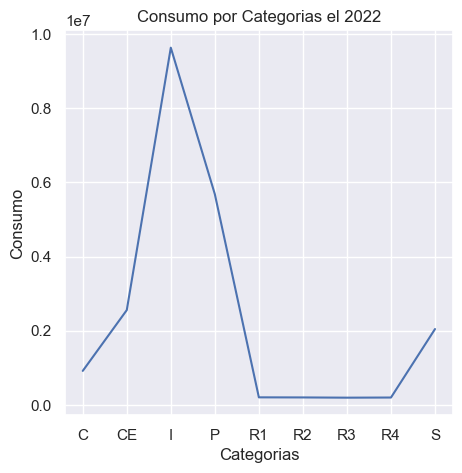

In [273]:
plt.figure(figsize=(5, 5))
plt.title('Consumo por Categorias el 2022')
plt.grid(visible=True)
plt.plot(df_2022_by_cat['category'], df_2022_by_cat['lecture'])
plt.ylabel('Consumo')
plt.xlabel('Categorias')
plt.show()

In [274]:
df_2022_by_zone = df_2022.groupby('zone')['lecture'].sum().reset_index()
df_2022_by_zone

,zone,lecture
0,Centro,2349202
1,Este,2340154
2,Nor-Este,2456715
3,Nor-Oeste,2373159
4,Norte,2476372
5,Oeste,2318088
6,Sur,2359383
7,Sur-Este,2505342
8,Sur-Oeste,2451107


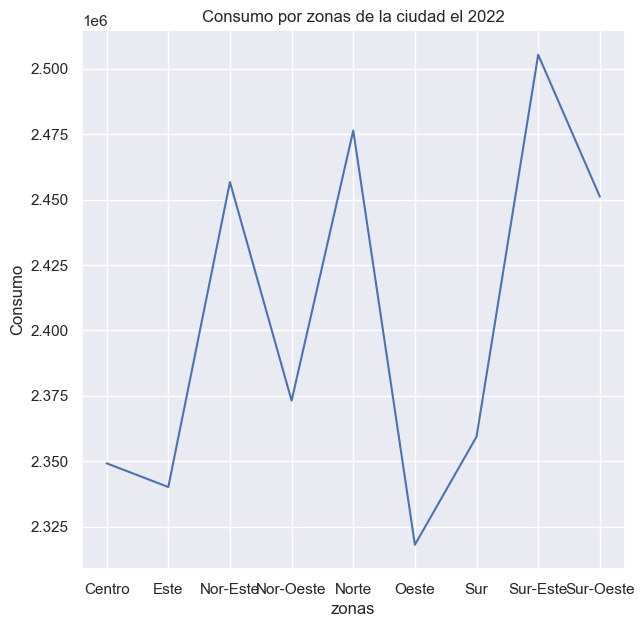

In [275]:
plt.figure(figsize=(7, 7))
plt.title('Consumo por zonas de la ciudad el 2022')
plt.grid(visible=True)
plt.plot(df_2022_by_zone['zone'], df_2022_by_zone['lecture'])
plt.ylabel('Consumo')
plt.xlabel('zonas')
plt.show()

# 2023

In [269]:
data_users_2023

,id,name,address,meter_code,category,zone,date_creation,year,month
338,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1
2036,2036,María Jaime Reséndez,Cerrada Mozambique 009 509\nSan José Manuél lo...,N3MK866121,CE,Este,2023-01-01,2023,1
6474,6474,Zoé Granados,Retorno Nicaragua 005 715\nSan Vicente los baj...,J6WY842727,I,Centro,2023-01-01,2023,1
6478,6478,Carolina Jos Villegas,"Corredor Tuvalu 428 Edif. 043 , Depto. 764\nSa...",S3KT177434,C,Este,2023-01-01,2023,1
6563,6563,Horacio Rivero,"Pasaje Sur Amaya 566 Edif. 583 , Depto. 055\nV...",Y8VS724182,S,Sur-Este,2023-01-01,2023,1
...,...,...,...,...,...,...,...,...,...
71698,71698,Eloisa Sanches Reynoso,"Corredor Quintana Roo 742 Edif. 429 , Depto. 3...",L7KE321658,S,Norte,2023-12-31,2023,12
72067,72067,María José Uribe Laboy,"Diagonal Norte Armendáriz 793 Edif. 924 , Dept...",U2FE523276,I,Oeste,2023-12-31,2023,12
73545,73545,Inés Ivonne Trejo,Diagonal Kenya 471 Interior 706\nSan Diana los...,C4SH253461,P,Sur-Oeste,2023-12-31,2023,12
74683,74683,Guillermina Leonor Pabón,Circunvalación Iraq 247 568\nVieja Timor-Leste...,T6VY825221,R1,Nor-Oeste,2023-12-31,2023,12


In [270]:
df_lectures['year'] = df_lectures['period'].apply(lambda d : d.split('-')[1])
df_lectures_2023 = df_lectures.loc[df_lectures['year']=='2023']
df_lectures_2023

,meter_code,period,lecture,year
18,A7XJ718334,ene-2023,62,2023
19,A7XJ718334,feb-2023,135,2023
20,A7XJ718334,mar-2023,76,2023
21,A7XJ718334,abr-2023,179,2023
22,A7XJ718334,may-2023,103,2023
...,...,...,...,...
1384497,X7OC137648,ago-2023,235,2023
1384498,X7OC137648,sep-2023,136,2023
1384499,X7OC137648,oct-2023,188,2023
1384500,X7OC137648,nov-2023,227,2023


## Lecturación 2023

In [271]:
df_2023 = pd.merge(data_users_2023, df_lectures_2023, on=['meter_code'],how="inner")
df_2023

,id,name,address,meter_code,category,zone,date_creation,year_x,month,period,lecture,year_y
0,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1,ene-2023,110,2023
1,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1,feb-2023,147,2023
2,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1,mar-2023,102,2023
3,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1,abr-2023,138,2023
4,338,Patricio Cuellar Arias,"Pasaje Quintana Roo 067 290\nVieja Malta, NL 5...",O3FI865555,S,Sur-Oeste,2023-01-01,2023,1,may-2023,72,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
161835,71698,Eloisa Sanches Reynoso,"Corredor Quintana Roo 742 Edif. 429 , Depto. 3...",L7KE321658,S,Norte,2023-12-31,2023,12,dic-2023,146,2023
161836,72067,María José Uribe Laboy,"Diagonal Norte Armendáriz 793 Edif. 924 , Dept...",U2FE523276,I,Oeste,2023-12-31,2023,12,dic-2023,98,2023
161837,73545,Inés Ivonne Trejo,Diagonal Kenya 471 Interior 706\nSan Diana los...,C4SH253461,P,Sur-Oeste,2023-12-31,2023,12,dic-2023,280,2023
161838,74683,Guillermina Leonor Pabón,Circunvalación Iraq 247 568\nVieja Timor-Leste...,T6VY825221,R1,Nor-Oeste,2023-12-31,2023,12,dic-2023,19,2023


In [276]:
df_2023_by_cat = df_2023.groupby('category')['lecture'].sum().reset_index()
df_2023_by_cat

,category,lecture
0,C,922941
1,CE,2395933
2,I,9255158
3,P,5645256
4,R1,206070
5,R2,198382
6,R3,197367
7,R4,209615
8,S,2060908


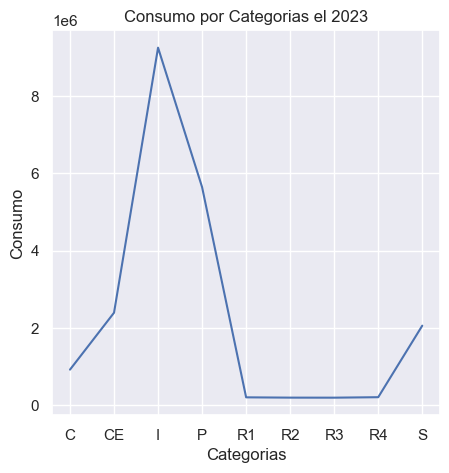

In [278]:
plt.figure(figsize=(5, 5))
plt.title('Consumo por Categorias el 2023')
plt.grid(visible=True)
plt.plot(df_2023_by_cat['category'], df_2023_by_cat['lecture'])
plt.ylabel('Consumo')
plt.xlabel('Categorias')
plt.show()

In [279]:
df_2023_by_zone = df_2023.groupby('zone')['lecture'].sum().reset_index()
df_2023_by_zone

,zone,lecture
0,Centro,2282240
1,Este,2309712
2,Nor-Este,2382460
3,Nor-Oeste,2372367
4,Norte,2380118
5,Oeste,2307940
6,Sur,2321236
7,Sur-Este,2246939
8,Sur-Oeste,2488618


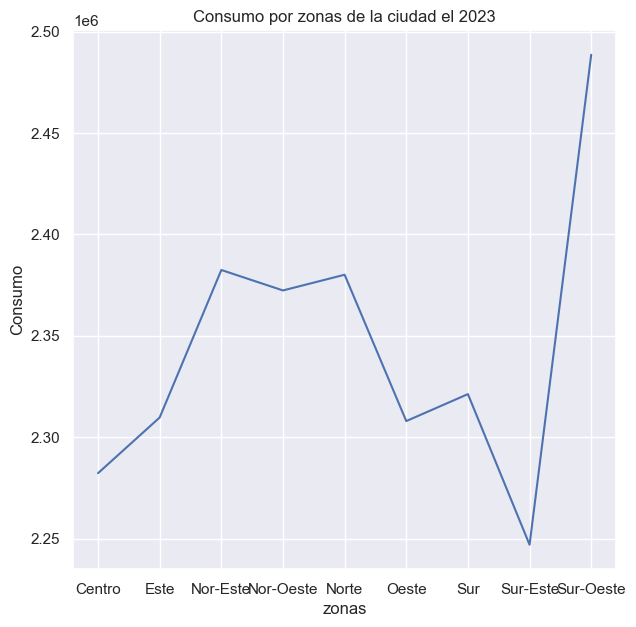

In [280]:
plt.figure(figsize=(7, 7))
plt.title('Consumo por zonas de la ciudad el 2023')
plt.grid(visible=True)
plt.plot(df_2023_by_zone['zone'], df_2023_by_zone['lecture'])
plt.ylabel('Consumo')
plt.xlabel('zonas')
plt.show()

# Conclusión
En base a los datos generados aleatoriamente se concluye:
* La aleatoriedad de los datos no ayudan a mostrar una varianza significativa dado que siguen una distribución equitativa en diferentes categorias como en la distribución por zonas de la ciudad de Cochabamba, como en el tipo de conección de agua.

* La categoria **industrial** es la que representa mayor consumo durante los 3 años de estudio.

* Las zonas Sur, Sur-Este y Sur-Oeste de la ciudad de Cochabamba, son las que que mayor cantidad de agua estan consumiendo los ultimos 3 años. Eso prende una alarma a poder realizar trabajos de control en el área de mejoramiento de redes y concientización sobre el uso del agua.

* Una medida recomendada para evitar el gasto indiscriminado de agua, sería el de distrubuir agua en diversas presiones en diversas horas del día.
